In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network import neural_network
from layers import Dense
import Activation_funcs as activations
import Optimizers
from sklearn.model_selection import train_test_split
import loss_funcs as losses


## Data PreProcessing


#### we will get all of our images and labels loaded from tensorflow


In [2]:
def preprocess():
    import tensorflow_datasets as tfds
    # load mnist
    ds = tfds.load('mnist', split='train')
    # convert to numpy array
    # as_numpy() gives them as an iterator of dictionaries
    # where each dictionary has a key 'image' and 'label'
    images = []
    lables = []
    for ex in tfds.as_numpy(ds):
        images.append(ex['image'])
        lables.append(ex['label'])

    # convert all labels to be one hot encoding
    from tensorflow.keras.utils import to_categorical
    one_hot_labels = to_categorical(lables)
    # images is a list of numpy arrays so will change it
    # to a multi-dimensional numpy array
    images = np.array(images)
    # return the result
    return images,one_hot_labels


In [3]:
IMAGES , LABELS = preprocess()

/Users/enesbayram/Documents/nn/neural-net/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### lastly we have to flatten the data and normalize it os that it can be fed to the neural network

In [4]:
# first lets shuffle the two lists
shuffler = np.arange(IMAGES.shape[0])
np.random.shuffle(shuffler)
IMAGES = IMAGES[shuffler]
LABELS = LABELS[shuffler]


In [5]:
# next lets flatten all of the images
flattened = IMAGES.reshape(IMAGES.shape[0],IMAGES.shape[1] * IMAGES.shape[2])


In [6]:
# lastly lets normalize the values
flattened = flattened / 255

/var/folders/fg/hzkwf1ld12x62mjy6qd9gxsm0000gn/T/ipykernel_6144/436891086.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[row,col].set_title(f"Label: {int(np.where(LABELS[index] == 1)[0])}")


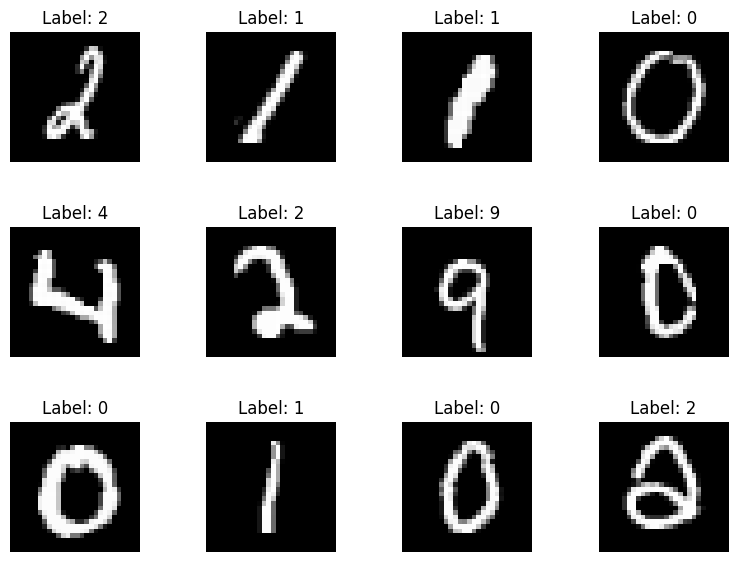

In [7]:
# lets see some images and make sure that labels are correct
image_count = 12
rows = 3
columns = np.ceil(image_count/rows).astype(int)
fig, axes = plt.subplots(rows,columns,figsize=(columns*2,rows*2))
index = 0
fig.tight_layout()
for row in range(rows):
    for col in range(columns):
        if index == image_count:
            break
        axes[row,col].axis('off')
        axes[row,col].imshow(IMAGES[index],cmap='gray')
        axes[row,col].set_title(f"Label: {int(np.where(LABELS[index] == 1)[0])}")
        index += 1

### Now that the data is ready lets create a neural network

In [8]:
model = neural_network()

model = model.sequential(
    [
        Dense(flattened.shape[1],20,activations.relu()),
        Dense(20,20,activations.relu()),
        Dense(20,LABELS.shape[1],activations.softmax())
    ]
)

In [9]:
model.compile(
    optimizer=Optimizers.MiniBatchGradientDescent(),
    Cost=losses.CategoricalCrossEntropy()
)

In [10]:
model.summary()

Summary of the neural network

--------------------------------------------------

layer with 20 units, 784 inputs and ReLU activation function

--------------------------------------------------

layer with 20 units, 20 inputs and ReLU activation function

--------------------------------------------------

layer with 10 units, 20 inputs and Softmax activation function

--------------------------------------------------

input size : 784
output size : 10
optimizer : Mini-Batch Gradient Descent
cost function : Categorical Cross Entropy


In [11]:
model , costs = model.fit(flattened,LABELS,learning_rate=0.0001,epochs=200)

0 cost : 91181.31455405593 accuracy : 52.17%
20 cost : 13716.962749044662 accuracy : 93.52%
40 cost : 9978.822404551229 accuracy : 95.36%
60 cost : 8233.520103442243 accuracy : 96.11%
80 cost : 7139.531522190252 accuracy : 96.61%
100 cost : 6375.748481637948 accuracy : 96.97%
120 cost : 5762.449463966985 accuracy : 97.25%
140 cost : 5275.609606134051 accuracy : 97.43%
160 cost : 4879.729153045882 accuracy : 97.65%
180 cost : 4557.297433448288 accuracy : 97.77%
 cost : 4308.413504790586 accuracy : 97.89%


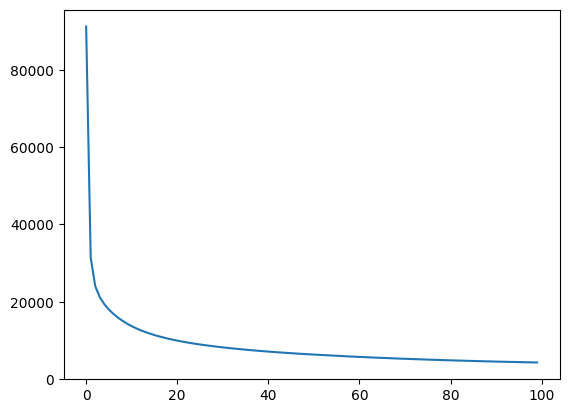

In [12]:
plt.plot(costs)

In [13]:
predictions = np.argmax(model.predict(flattened),axis=1)
labels_sparse = np.argmax(LABELS,axis=1)

In [14]:
accuracy = (np.sum((predictions == labels_sparse).astype(int)) / LABELS.shape[0]) * 100
print(f"accuracy : {accuracy:.2f}%")

accuracy : 97.89%


## plot some of the correctly classified images

In [15]:
# get the correct image indices 
correct_indices = np.where(predictions == labels_sparse)[0]

In [16]:
image_count = 15
# get correct images labels and prediction 
random_indices = np.random.choice(correct_indices,image_count)
correct_images = IMAGES[correct_indices]
correct_labels = labels_sparse[correct_indices]
correct_predictions = predictions[correct_indices]

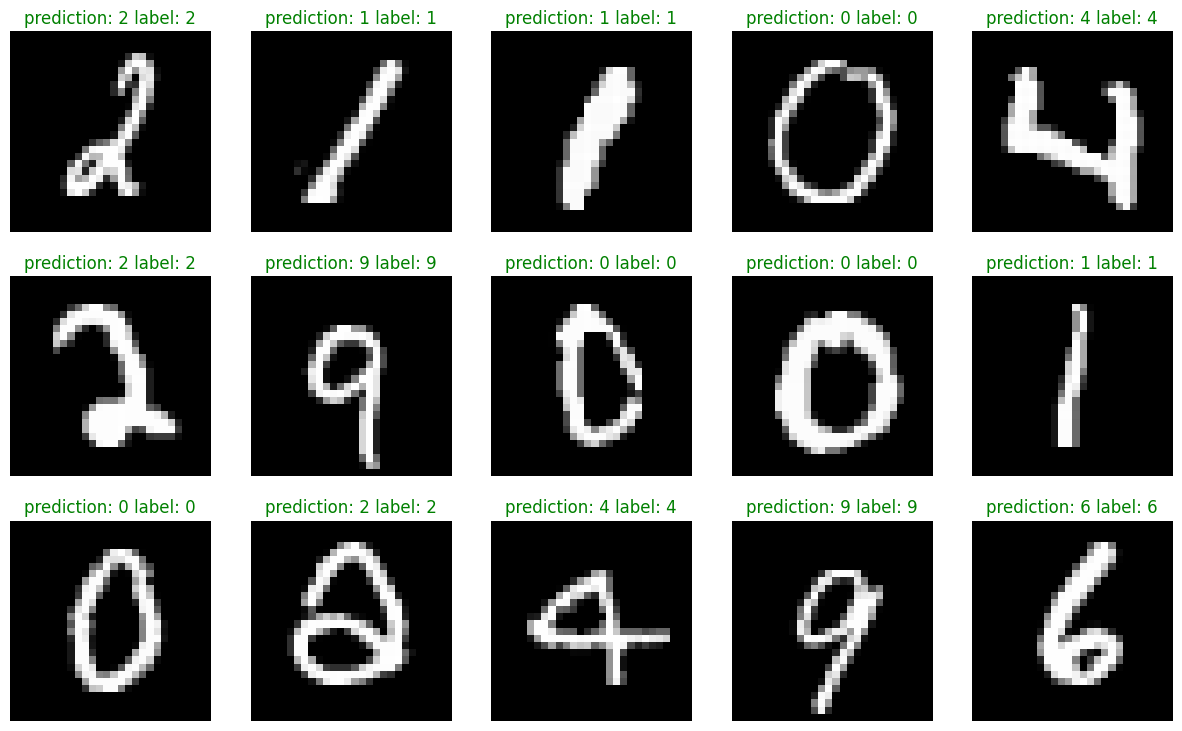

In [22]:

scaling_factor = 3
rows = 3
columns = np.ceil(image_count/rows).astype(int)
fig , ax = plt.subplots(rows,columns,figsize=(columns*scaling_factor,rows*scaling_factor))
index = 0
for row in range(rows):
    for col in range(columns):
        if index == image_count:
            break
        ax[row, col].imshow(correct_images[index],cmap = "gray")
        ax[row,col].set_title(f"prediction: {correct_predictions[index]} label: {correct_labels[index]}",color = "green")
        ax[row, col].axis('off')
        index += 1

## See which images did the model predict incorrectly

In [18]:
wrong_indices = np.where(predictions != labels_sparse)[0]
np.random.shuffle(wrong_indices)

In [19]:
# get the labels and images of the of the wrong predictions
wrong_images = IMAGES[wrong_indices]
wrong_labels = labels_sparse[wrong_indices]
wrong_predictions = predictions[wrong_indices]

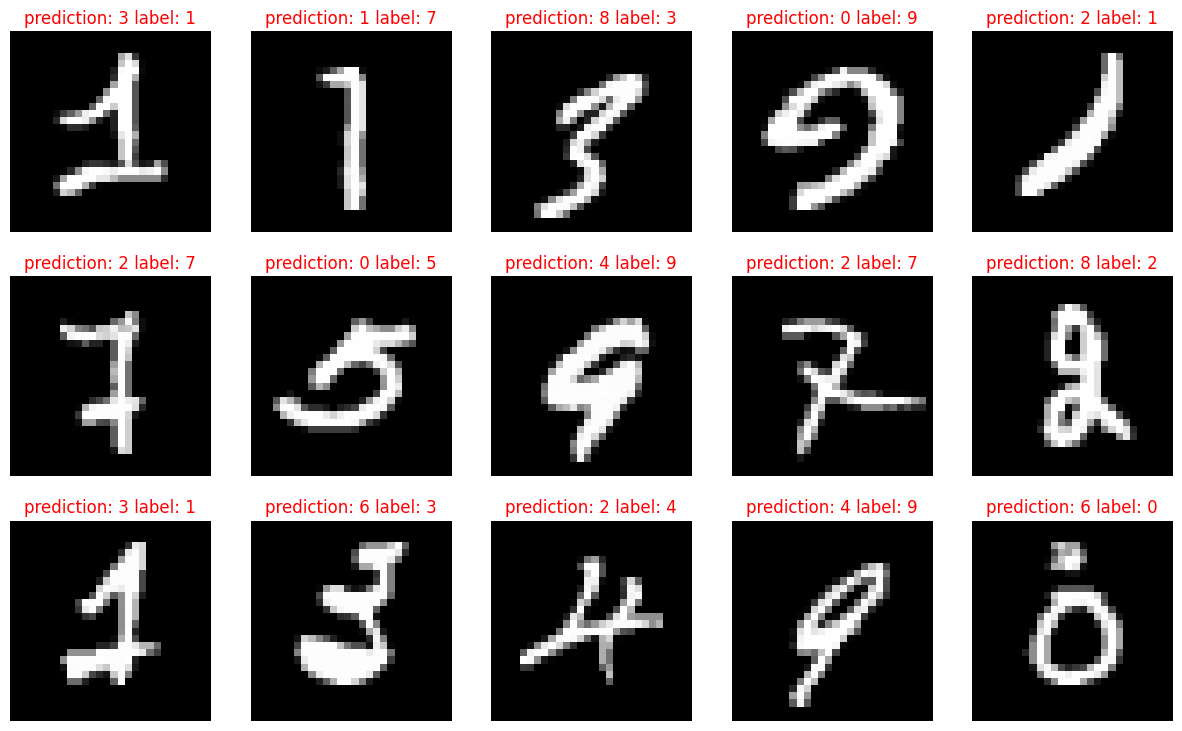

In [23]:
import matplotlib.pyplot as plt

scaling_factor = 3
image_count = 15

rows = 3
columns = np.ceil(image_count/rows).astype(int)
fig, ax = plt.subplots(rows, columns, figsize=(columns*scaling_factor,rows*scaling_factor))
index = 0
for row in range(rows):
    for col in range(columns):
        if index == image_count:
            break
        ax[row, col].imshow(wrong_images[index],cmap = "gray")
        ax[row,col].set_title(f"prediction: {wrong_predictions[index]} label: {wrong_labels[index]}",color = "red")
        ax[row, col].axis('off')
        index += 1